<a href="https://colab.research.google.com/github/Akshay4729/Swiggy-Data-Analysis/blob/main/Swiggy_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libs**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
swiggy = pd.read_csv('/content/Swiggy data.csv')

# **Feature Engineering**

In [3]:
swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [4]:
swiggy.shape

(118, 5)

In [5]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [6]:
swiggy.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [7]:
swiggy.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

# **Checking Numerical And Categorical Columns**

**Changing Rating Column Object to Intger**

In [8]:
swiggy['Rating'] = pd.to_numeric(swiggy['Rating'],errors='coerce')

**Changing Cost Column Object to Intger**

In [9]:
cost = []
for x in swiggy['Cost_for_Two']:
  cost.append(x[2:])

In [10]:
swiggy['Cost_for_Two_in_₹'] = cost

In [11]:
swiggy['Cost_for_Two_in_₹'] = pd.to_numeric(swiggy['Cost_for_Two_in_₹'],errors='coerce')

In [12]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shop_Name          118 non-null    object 
 1   Cuisine            118 non-null    object 
 2   Location           118 non-null    object 
 3   Rating             117 non-null    float64
 4   Cost_for_Two       118 non-null    object 
 5   Cost_for_Two_in_₹  118 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ KB


In [13]:
swiggy.select_dtypes(include=[int,float]).head()

,Rating,Cost_for_Two_in_₹
0,4.3,150
1,4.4,400
2,4.1,126
3,4.4,400
4,4.1,450


In [14]:
swiggy.select_dtypes(include=[object]).head()

,Shop_Name,Cuisine,Location,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",₹ 450


In [15]:
swiggy['Rating'].fillna(swiggy['Rating'].mean(),inplace=True)

In [16]:
swiggy.isnull().sum()

Shop_Name            0
Cuisine              0
Location             0
Rating               0
Cost_for_Two         0
Cost_for_Two_in_₹    0
dtype: int64

# **Analyzing Columns**

In [17]:
swiggy.describe()

,Rating,Cost_for_Two_in_₹
count,118.000000,118.000000
mean,4.096581,321.008475
std,0.208344,137.286804
min,3.600000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


# **EDA**

# **Analyzing Each Numerical Columns**

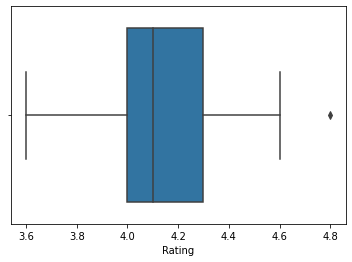

In [18]:
sns.boxplot(swiggy['Rating'])

In [19]:
swiggy['Rating'].describe()

count    118.000000
mean       4.096581
std        0.208344
min        3.600000
25%        4.000000
50%        4.100000
75%        4.300000
max        4.800000
Name: Rating, dtype: float64

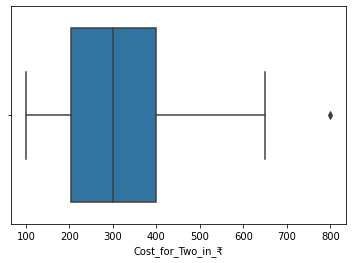

In [20]:
sns.boxplot(swiggy['Cost_for_Two_in_₹'])

In [21]:
swiggy['Cost_for_Two_in_₹'].describe()

count    118.000000
mean     321.008475
std      137.286804
min      100.000000
25%      204.750000
50%      300.000000
75%      400.000000
max      800.000000
Name: Cost_for_Two_in_₹, dtype: float64

# **Exploration**


**1. Rating Distrbution**

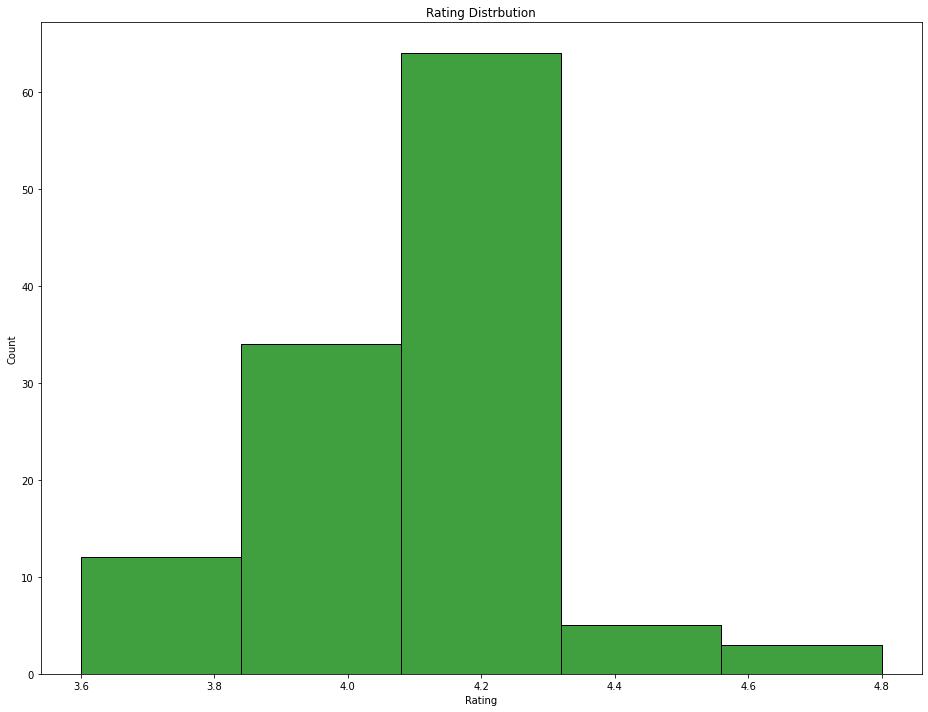

In [22]:
plt.figure(figsize = (13,10))
sns.histplot(data = swiggy ,x = 'Rating',color = 'green',bins = 5)

plt.title("Rating Distrbution")                         
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



**2.   Cost Distrbution**




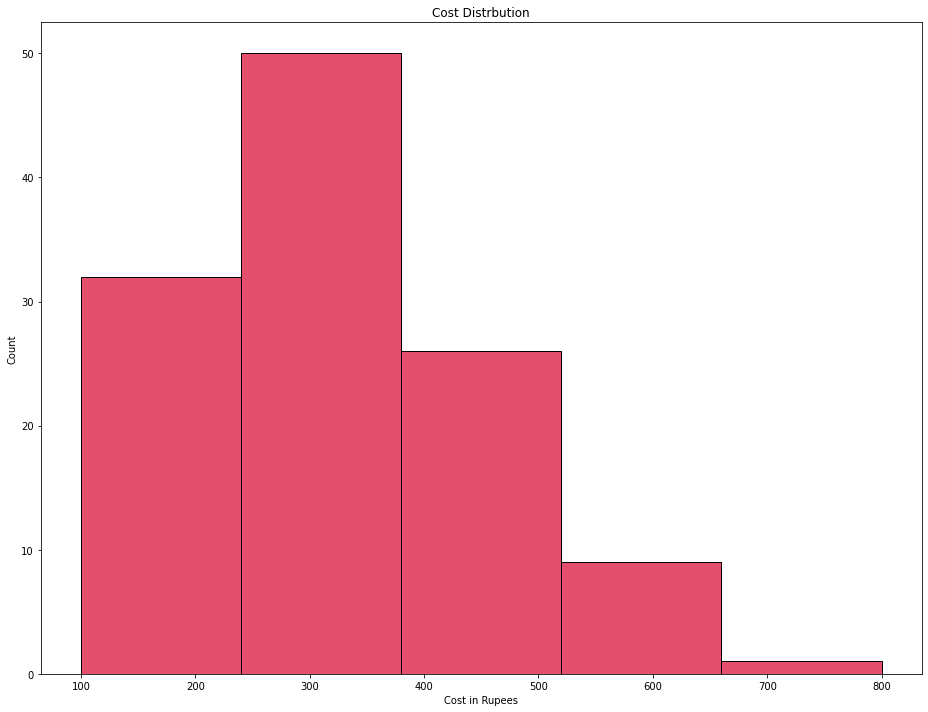

In [23]:
plt.figure(figsize = (13,10))
sns.histplot(data = swiggy ,x = 'Cost_for_Two_in_₹',color = 'Crimson',bins=5)

plt.title("Cost Distrbution")                         
plt.xlabel('Cost in Rupees')                         
plt.ylabel('Count')
plt.tight_layout()
plt.show()



**3.   Top Ten Shope Name**



In [24]:
df1 = swiggy.groupby(['Shop_Name'])[['Rating']].mean()
df1.reset_index(inplace=True)

df1.head()

,Shop_Name,Rating
0,800 Momos,3.7
1,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1
2,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1
3,A2B - Adyar Ananda Bhavan,4.2
4,Abhiruchi Hotel,4.0


In [25]:
sorted_df1 = df1.sort_values(by=['Rating'],ascending=False)

In [26]:
sorted_df1.head()

,Shop_Name,Rating
55,Khichdi Experiment,4.8
27,Corner House Ice Cream,4.6
74,Natural Ice Cream,4.6
26,Chinese Bae,4.5
69,Mumbai Tiffin,4.4


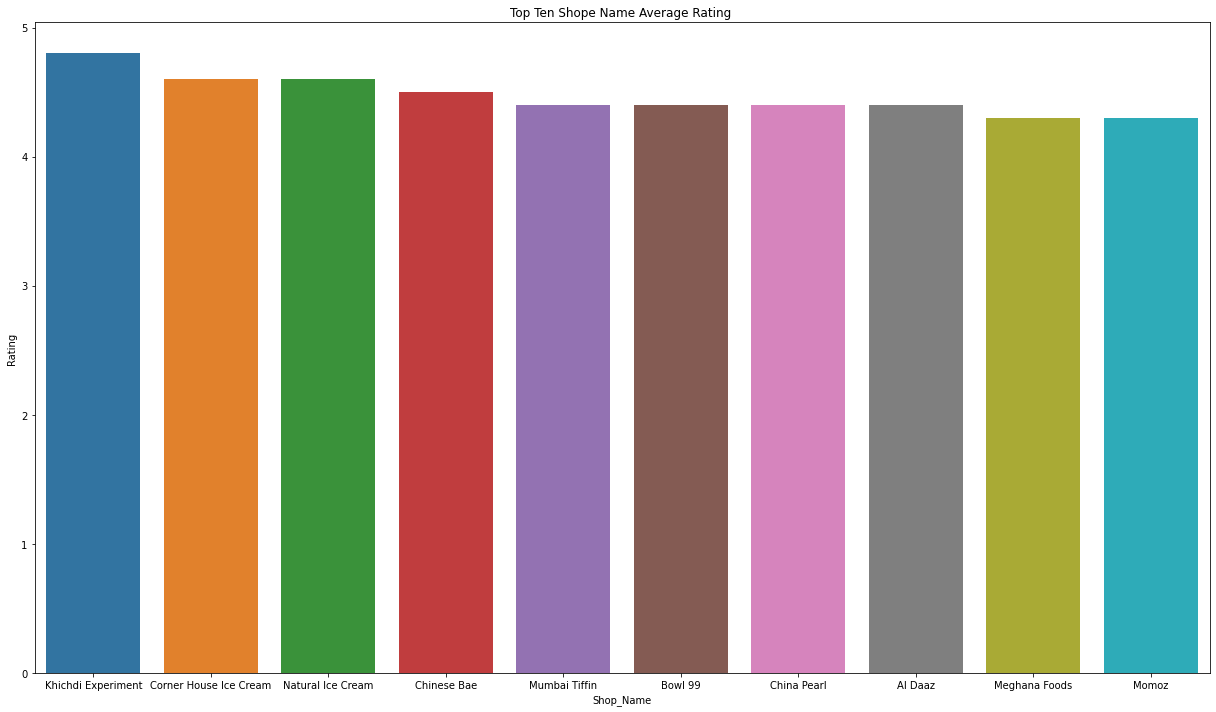

In [27]:
plt.figure(figsize = (17,10))
sns.barplot(sorted_df1['Shop_Name'][0:10],sorted_df1['Rating'][0:10])
plt.title("Top Ten Shope Name Average Rating ")
plt.tight_layout()
plt.show()

**4. Top Five location with costly cusion**

In [28]:
df2 = swiggy.groupby(['Location'])[['Cost_for_Two_in_₹']].mean()
df2.reset_index(inplace=True)

df2.head()

,Location,Cost_for_Two_in_₹
0,"16th Main Road, 2nd Stage, BTM",250.0
1,"16th Main Road, BTM",400.0
2,"1st Block, Koramangala",276.4
3,"1st Cross Road, 5th Block, Near Jyothi Nivas C...",350.0
4,"1st MAin, Koramangala",150.0


In [29]:
df2.rename(columns={'Cost_for_Two_in_₹':'Average Cost Of Cuisine'},inplace=True)

In [30]:
sorted_df2 = df2.sort_values(by=['Average Cost Of Cuisine'],ascending=False)

In [31]:
sorted_df2.head()

,Location,Average Cost Of Cuisine
56,"Sector 3, HSR",800.0
36,"Hosur Main Road, Koramangala",600.0
42,"KHB Colony, Koramangala",600.0
50,"Madiwala, BTM",600.0
34,"HSR 1st sector, HSR",600.0


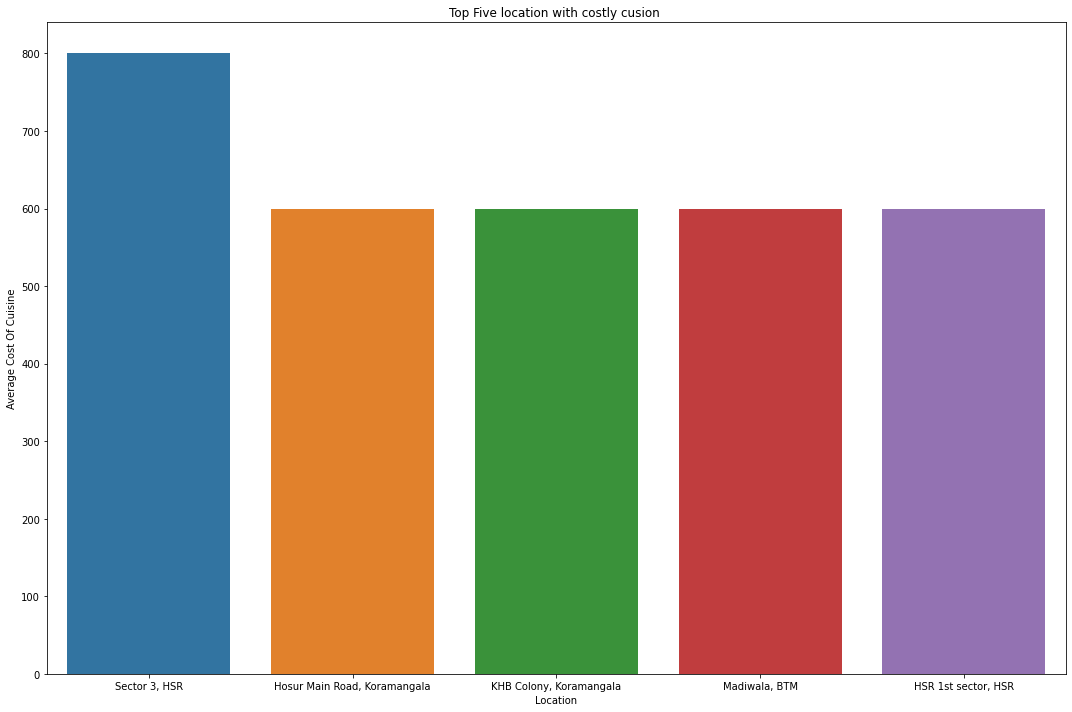

In [32]:
plt.figure(figsize = (15,10))
sns.barplot(sorted_df2['Location'][0:5],sorted_df2['Average Cost Of Cuisine'][0:5])
plt.title("Top Five location with costly cusion ")
plt.tight_layout()
plt.show()



**5.   Top Five location with Most Number of Shops**




In [33]:
df3 = swiggy.groupby(['Location'])[['Shop_Name']].count()
df3.reset_index(inplace=True)

df3.head()

,Location,Shop_Name
0,"16th Main Road, 2nd Stage, BTM",1
1,"16th Main Road, BTM",1
2,"1st Block, Koramangala",5
3,"1st Cross Road, 5th Block, Near Jyothi Nivas C...",1
4,"1st MAin, Koramangala",1


In [34]:
df3.rename(columns={'Shop_Name':'No of Shop Available'},inplace=True)


In [35]:
sorted_df8 = df3.sort_values(by=['No of Shop Available'],ascending=False)

In [36]:
sorted_df8.head()

,Location,No of Shop Available
29,"BTM, BTM",13
46,"Koramangala, Koramangala",12
16,"5th Block, Koramangala",10
35,"HSR, HSR",8
21,"7th Block, Koramangala",5


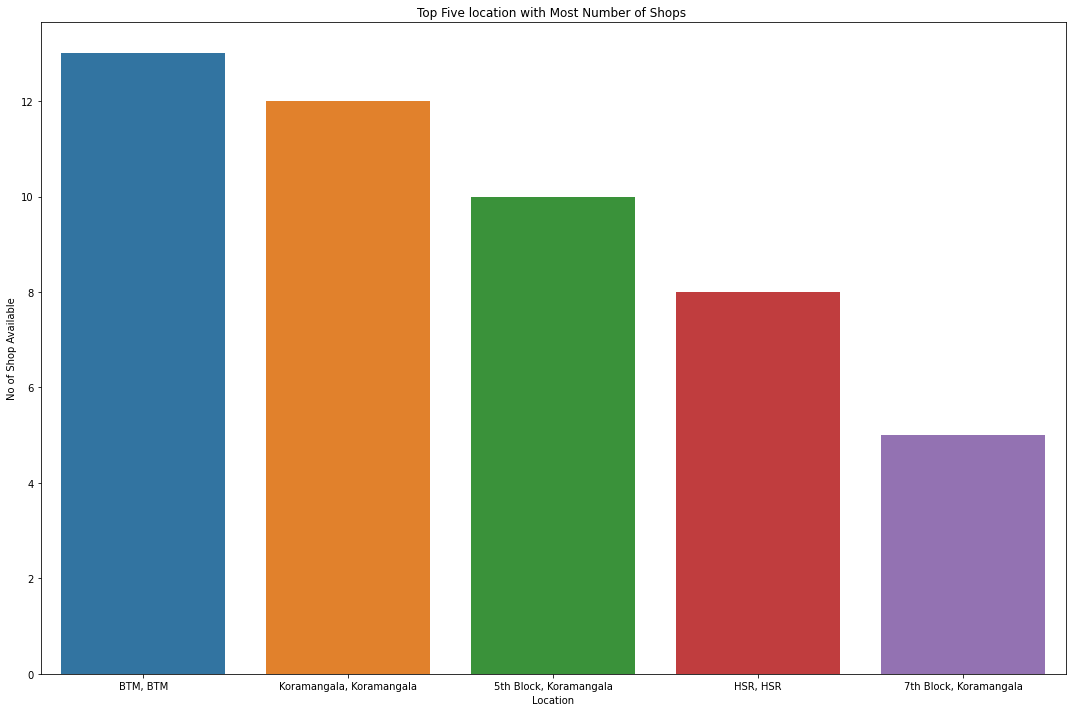

In [37]:
plt.figure(figsize = (15,10))
sns.barplot(sorted_df8['Location'][0:5],sorted_df8['No of Shop Available'][0:5])
plt.title("Top Five location with Most Number of Shops ")
plt.tight_layout()
plt.show()



**6.   Top Five Shop with Most Number of Cusion**



In [38]:
df4 = swiggy.groupby(['Shop_Name']).count()[['Cuisine']]
df4.reset_index(inplace=True)

df4.head()

,Shop_Name,Cuisine
0,800 Momos,1
1,99 VARIETY DOSA AND JUICE-Malli mane food court,1
2,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,1
3,A2B - Adyar Ananda Bhavan,1
4,Abhiruchi Hotel,1


In [39]:
sorted_df4 = df4.sort_values(by=['Cuisine'],ascending=False)

In [40]:
sorted_df4.head()

,Shop_Name,Cuisine
59,La Pino'z Pizza,2
60,Leon Grill,2
34,Easy Bites,2
73,Nandhana Palace,1
84,Punjabi Swag,1


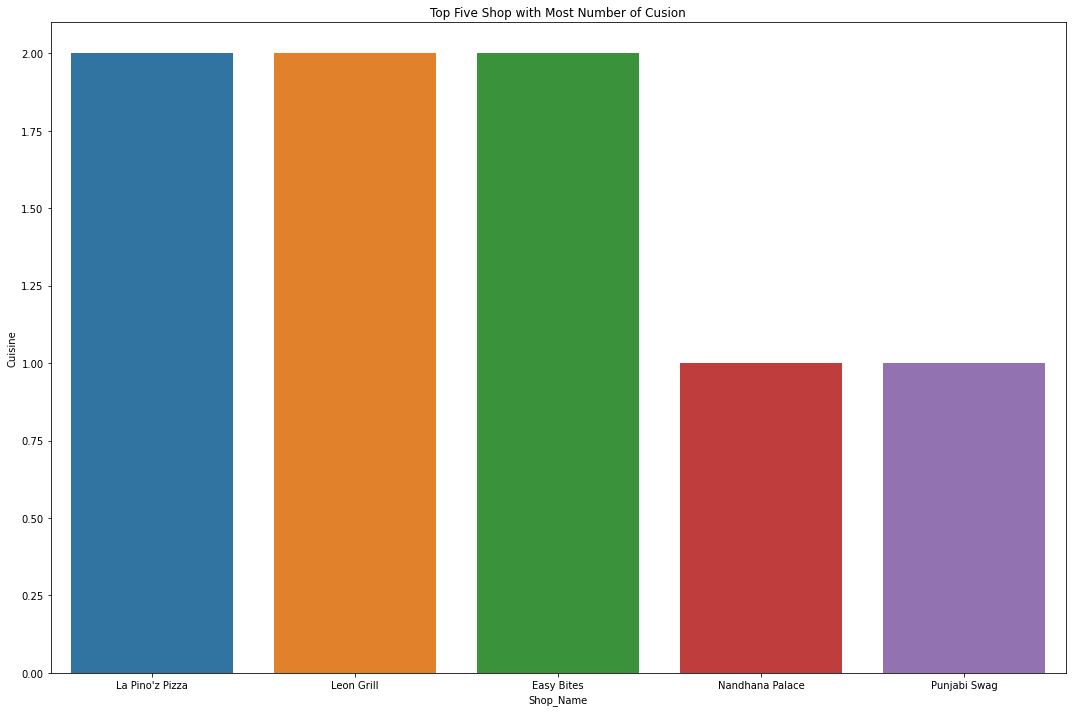

In [41]:
plt.figure(figsize = (15,10))
sns.barplot(sorted_df4['Shop_Name'][0:5],sorted_df4['Cuisine'][0:5])
plt.title("Top Five Shop with Most Number of Cusion")
plt.tight_layout()
plt.show()



**7.   Top Five Cuisine with Most Number of Rating**



In [42]:
df5 = swiggy.groupby(['Cuisine']).count()[['Rating']]
df5.reset_index(inplace=True)



In [43]:
df5.rename(columns={'Rating':'Rating Count'},inplace=True)
df5.head()

,Cuisine,Rating Count
0,American,1
1,"American, Arabian, Chinese, Desserts, Fast Foo...",1
2,"American, Fast Food",3
3,"Andhra, Biryani",3
4,"Andhra, Biryani, Chinese, Desserts, Fast Food,...",2


In [44]:
sorted_df5 = df5.sort_values(by=['Rating Count'],ascending=False)

In [45]:
sorted_df5.head()

,Cuisine,Rating Count
53,North Indian,12
34,Desserts,5
21,Chinese,4
12,Biryani,4
2,"American, Fast Food",3


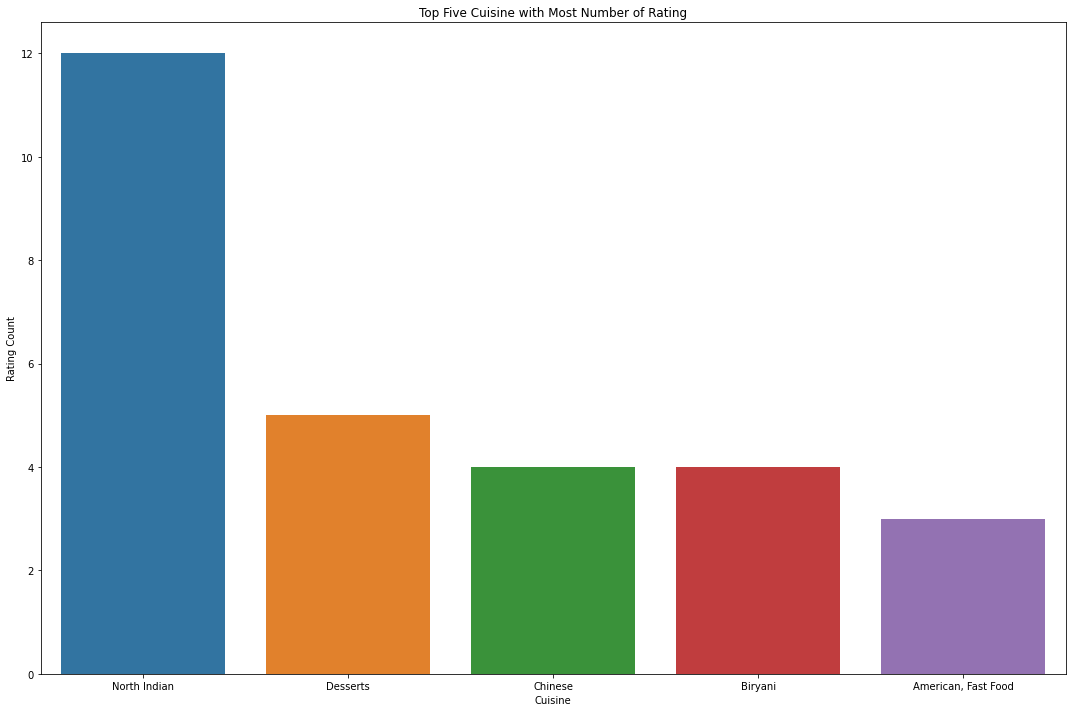

In [46]:
plt.figure(figsize = (15,10))
sns.barplot(sorted_df5['Cuisine'][0:5],sorted_df5['Rating Count'][0:5])
plt.title("Top Five Cuisine with Most Number of Rating")
plt.tight_layout()
plt.show()